***

<img src="assets/object_detection_cover.png" width="100%">
    
***

# Object Detection with Python, Google Vision API and google-vision-wrapper

### Introduction
In this quick tutorial we are going to show how to use google-vision-wrapper to perform object detection on images. Please refer to the [Official Github Page](https://github.com/gcgrossi/google-vision-wrapper) for more information.

### Before you begin
Before starting, it is mandatory to correctly setup a Google Cloud Project, authorise the Google Vision API and generate a .json API key file. Be sure to have fulfilled all the steps in the [Before you Begin Guide](https://cloud.google.com/vision/docs/before-you-begin) before moving on.

### Imports

In [2]:
# the main class
from gvision import GVisionAPI

#other imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Read The input image
You can read the input image in the way you prefer, the class accepts 2 formats:
1. numpy.ndarray
2. bytes

The Google Vision API accepts images in bytes format. If you chose to go on with numpy array the wrapper will perform the conversion. I always chose to read the image using OpenCV.

In [3]:
#read the image from disk
img = cv2.imread(os.path.join(os.getcwd(),'images','bagend.png'))

we are going to use this image: 

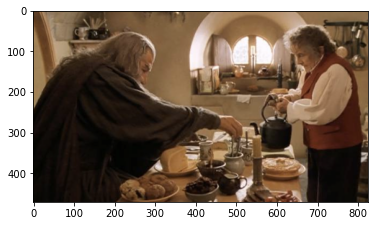

In [4]:
#show the image
#transform to RGB -> an OpenCV speciality
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

of Gandalf and Bilbo, having a cup of tea, before the long-expected party. Being a respectable Hobbit-hole, Bilbo's kitchen is full of food and objects. Let's see what Google Vision API is able to detect.

### Initialize the class
```authfile``` is the path to your API key file in .json format.

In [5]:
# path to auth key file
authfile = os.path.join(os.getcwd(),'gvision_auth.json')
gvision = GVisionAPI(authfile)

### Perform a request
The method we are goin to use is: ```.perform_request(img,option)```. It accepts 2 parameters:
1. the image already loaded
2. an option that specifies what kind of request to make

You can access the possibile options in this two ways:

In [6]:
# method to print request options
gvision.request_options()

#request options from the class attribute
print('\nPossible Options:')
print(gvision.request_types)

Possible Request Options: 
* face detection
* landmark detection
* logo detection
* object detection
* label detection
* image properties
* text detection

Possible Options:
['face detection', 'landmark detection', 'logo detection', 'object detection', 'label detection', 'image properties', 'text detection']


We are ready to perform the actual request. The body of the response from the API can be accessed using the  ```.response``` attribute.

In [7]:
#perform a request to the API
gvision.perform_request(img,'object detection')

# print the response
print(gvision.response)

localized_object_annotations {
  mid: "/m/01g317"
  name: "Person"
  score: 0.86678714
  bounding_poly {
    normalized_vertices {
      x: 0.71503806
      y: 0.08183617
    }
    normalized_vertices {
      x: 0.9883519
      y: 0.08183617
    }
    normalized_vertices {
      x: 0.9883519
      y: 0.98961705
    }
    normalized_vertices {
      x: 0.71503806
      y: 0.98961705
    }
  }
}
localized_object_annotations {
  mid: "/m/01g317"
  name: "Person"
  score: 0.8270002
  bounding_poly {
    normalized_vertices {
      x: 0.0117522
      y: 0.0875962
    }
    normalized_vertices {
      x: 0.6110526
      y: 0.0875962
    }
    normalized_vertices {
      x: 0.6110526
      y: 0.9887473
    }
    normalized_vertices {
      x: 0.0117522
      y: 0.9887473
    }
  }
}
localized_object_annotations {
  mid: "/m/02wbm"
  name: "Food"
  score: 0.65721697
  bounding_poly {
    normalized_vertices {
      x: 0.2498275
      y: 0.85064596
    }
    normalized_vertices {
      x: 0.431

And it is quite verbose. 

### Obtaining the information as list
The information regarding object detection can be accessed using different methods. In the following, we are going to obtain the objects descriptions and bounding box coordinates in form of lists, with the correponding headers.

In [8]:
# obtaining objects 
headers,objs = gvision.objects()
print(headers)
print(objs)

['OBJECT_NAME', 'CONFIDENCE', 'BBOX_1', 'BBOX_2', 'BBOX_3', 'BBOX_4']
[['Person', 0.8667871356010437, (589.9064004421234, 38.54483675211668), (815.3903022408485, 38.54483675211668), (815.3903022408485, 466.10963040590286), (589.9064004421234, 466.10963040590286)], ['Person', 0.8270002007484436, (9.695565258152783, 41.25781039148569), (504.1183724999428, 41.25781039148569), (504.1183724999428, 465.6999776959419), (9.695565258152783, 465.6999776959419)], ['Food', 0.6572169661521912, (206.10769093036652, 400.65424686670303), (356.19667544960976, 400.65424686670303), (356.19667544960976, 469.03570514917374), (206.10769093036652, 469.03570514917374)], ['Tableware', 0.602661669254303, (365.4427081346512, 407.2481338977814), (458.9526504278183, 407.2481338977814), (458.9526504278183, 468.4579465985298), (365.4427081346512, 468.4579465985298)], ['Tableware', 0.5556409358978271, (304.5626275241375, 333.94612669944763), (406.4356617629528, 333.94612669944763), (406.4356617629528, 404.70383459329

Remember: for each object detected (there could be more than 1) a list with the corresponding information is filled. I.e. the first object is ```objs[0]```. As you can see, each list contains the object name, the detection confidence and 2-tuples, corresponding to the (x,y) bounding box coordinates.

### Obtaining the information as pandas DataFrame
the same information can also de retrieved as a pandas DataFrame for convenience, using the method ```.to_df(option,name)```. It accepts 2 parameters:
1. an option, specifying the type of information to dump
2. the optional name or id of the image, that will be appended to each row of the DataFrame. Default is set to ```'image'```.

You can access the possible options in the two following ways:

In [9]:
# method to print df options
gvision.df_options()

#request options from the class attribute
print('\nPossible Options:')
print(gvision.df_types)

Possible DataFrame Options: 
* face landmarks
* face
* head
* angles
* objects
* landmarks
* logos
* labels
* colors
* crop hints
* texts
* pages
* blocks
* paragraphs
* words
* symbols

Possible Options:
['face landmarks', 'face', 'head', 'angles', 'objects', 'landmarks', 'logos', 'labels', 'colors', 'crop hints', 'texts', 'pages', 'blocks', 'paragraphs', 'words', 'symbols']


Let's obtain the information.

In [10]:
# obtain the information as a pandas DataFrame
df_face  =gvision.to_df('objects','bagend')
df_face

,IMAGE_NAME,OBJECT_NAME,CONFIDENCE,BBOX_1,BBOX_2,BBOX_3,BBOX_4
0,bagend,Person,0.866787,"(589.9064004421234, 38.54483675211668)","(815.3903022408485, 38.54483675211668)","(815.3903022408485, 466.10963040590286)","(589.9064004421234, 466.10963040590286)"
1,bagend,Person,0.827000,"(9.695565258152783, 41.25781039148569)","(504.1183724999428, 41.25781039148569)","(504.1183724999428, 465.6999776959419)","(9.695565258152783, 465.6999776959419)"
2,bagend,Food,0.657217,"(206.10769093036652, 400.65424686670303)","(356.19667544960976, 400.65424686670303)","(356.19667544960976, 469.03570514917374)","(206.10769093036652, 469.03570514917374)"
3,bagend,Tableware,0.602662,"(365.4427081346512, 407.2481338977814)","(458.9526504278183, 407.2481338977814)","(458.9526504278183, 468.4579465985298)","(365.4427081346512, 468.4579465985298)"
4,bagend,Tableware,0.555641,"(304.5626275241375, 333.94612669944763)","(406.4356617629528, 333.94612669944763)","(406.4356617629528, 404.70383459329605)","(304.5626275241375, 404.70383459329605)"
5,bagend,Food,0.538866,"(555.6242242455482, 356.6481916308403)","(667.1563759446144, 356.6481916308403)","(667.1563759446144, 416.1108321547508)","(555.6242242455482, 416.1108321547508)"
6,bagend,Clothing,0.536028,"(4.211487073916942, 54.94311513751745)","(446.0143268108368, 54.94311513751745)","(446.0143268108368, 466.4765548110008)","(4.211487073916942, 466.4765548110008)"
7,bagend,Food,0.521467,"(307.2648525238037, 332.8184587955475)","(401.24056935310364, 332.8184587955475)","(401.24056935310364, 401.6179638504982)","(307.2648525238037, 401.6179638504982)"
8,bagend,Food,0.516025,"(364.41126242280006, 408.5163953304291)","(460.7204496860504, 408.5163953304291)","(460.7204496860504, 468.70791560411453)","(364.41126242280006, 468.70791560411453)"


### Draw the results
You can now draw the results in the way you prefer. I will do it using OpenCV.

True

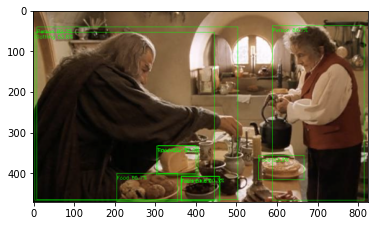

In [11]:
#copy the original image
#transform to RGB -> an OpenCV speciality
boxed = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

# draw rectangles and information 
# on the detected objects
for obj in objs:
    
    name = obj[0]
    score = obj[1]*100
    
    tl,tr,br,bl = obj[2],obj[3],obj[4],obj[5]
    cv2.rectangle(boxed, (int(tl[0]),int(tl[1])), (int(br[0]),int(br[1])), (0, 255, 0), 1)
    
    # draw name and confidence
    cv2.putText(boxed, "{} {:.1f}%".format(name,score), (int(tl[0]), int(tl[1] + 15)), cv2.FONT_HERSHEY_SIMPLEX,0.4, (0, 255, 0), 1)

#show the image
plt.imshow(boxed)

# save to disk
output = cv2.cvtColor(boxed, cv2.COLOR_RGB2BGR)
cv2.imwrite(os.path.join(os.getcwd(),'assets','output_bagend.jpg'), output)

As you can see the API has correctly spotted 2 People, 1 Clothing (Gandalf's robe), some Food and Tableware associated on a very crowded image. Unfortunately, the Vision API does not have the power to spot the ring inside Bilbo's pocket, this is an exclusive power of Sauron's eye! 

Let's wait and see, maybe in the future Google will build an API worthy of Mordor and surpass even the power of th Master of the One Ring!

<image src="assets/face_detection_cover.png" width="50%">